In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df= pd.read_csv("../Data/BrentOilPrices.csv")
brent_oil=pd.read_csv("../Data/BrentOilPrices.csv")
brent_oil['Date'] = pd.to_datetime(brent_oil['Date'])


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20036\1246092242.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil['Date'] = pd.to_datetime(brent_oil['Date'])


In [22]:
df=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
brent_oil=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20036\1139849646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20036\1139849646.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])


In [4]:
df.head()
df.info

<bound method DataFrame.info of             Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2022-11-08  96.85
2022-11-09  93.05
2022-11-10  94.25
2022-11-11  96.37
2022-11-14  93.59

[9011 rows x 1 columns]>

In [5]:
df.isnull().sum()

Price    0
dtype: int64

Graph_for oil_price

# Basic exploration of the data

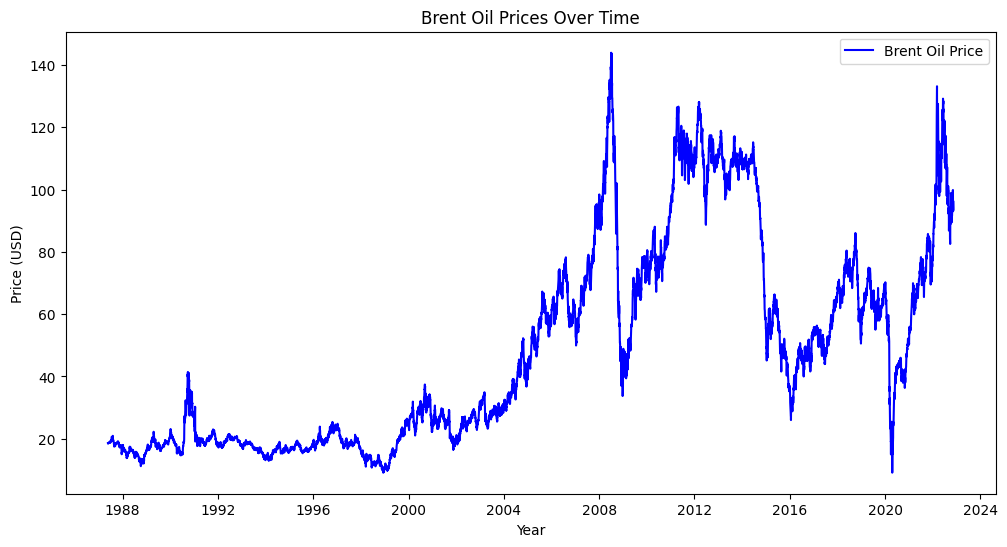

In [6]:
def plot_prices(df):
    """Plots oil prices over time."""
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Price'], label="Brent Oil Price", color="blue")
    plt.xlabel("Year")
    plt.ylabel("Price (USD)")
    plt.title("Brent Oil Prices Over Time")
    plt.legend()
    plt.show()


plot_prices(df)



# Price shift in percent

In [7]:

def detect_price_shocks(df, threshold=5):
    """Detects significant price changes based on percentage change threshold."""
    df["Price_Change"] = df["Price"].pct_change() * 100
    return df[abs(df["Price_Change"]) > threshold]

detect_price_shocks(df)


,Price,Price_Change
Date,,
1987-12-14,16.80,-5.245347
1987-12-17,15.03,-5.649718
1987-12-22,16.70,8.441558
1988-01-08,16.88,-5.698324
1988-07-07,15.50,6.896552
...,...,...
2022-07-12,106.98,-6.852416
2022-07-22,106.77,-5.354135
2022-08-15,98.25,-5.255545


# Change Point analysis

In [8]:
import sys
import os
sys.path.append(os.path.abspath(".."))

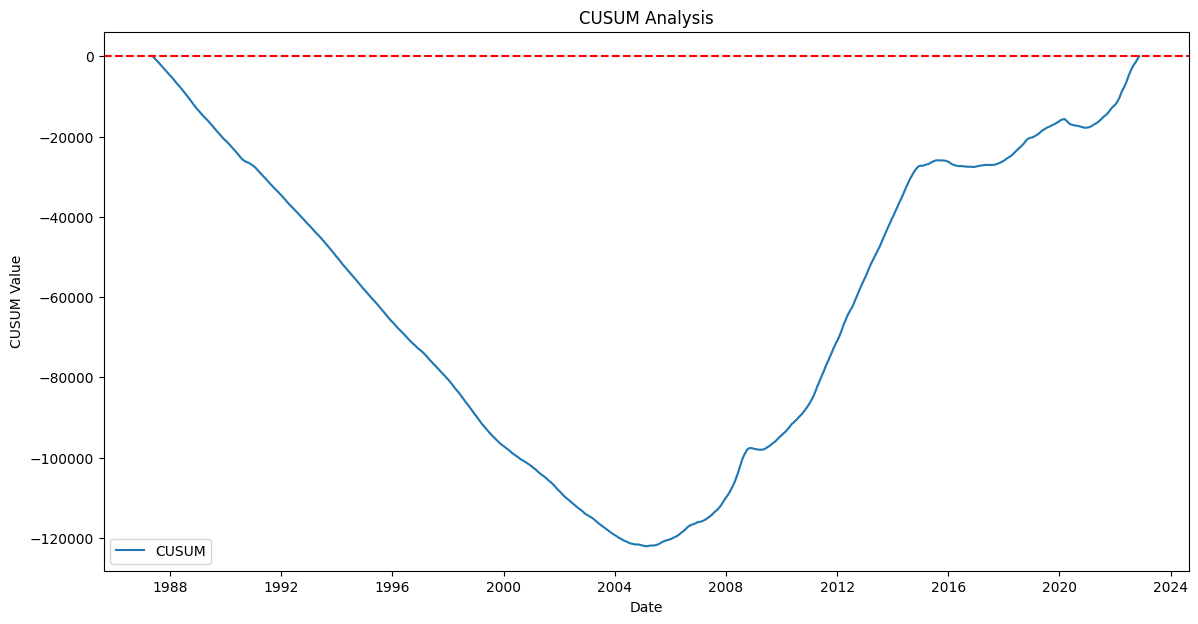

In [9]:
from scripts.cusum_analysis import *
from scripts.cusum_analysis import calculate_cusum, plot_cusum


# Calculate the CUSUM
cusum = calculate_cusum(df)

# Plot the results
plot_cusum(df, cusum)


# Change point analysis using rupture

In [11]:
from scripts.change_point_analysis import *

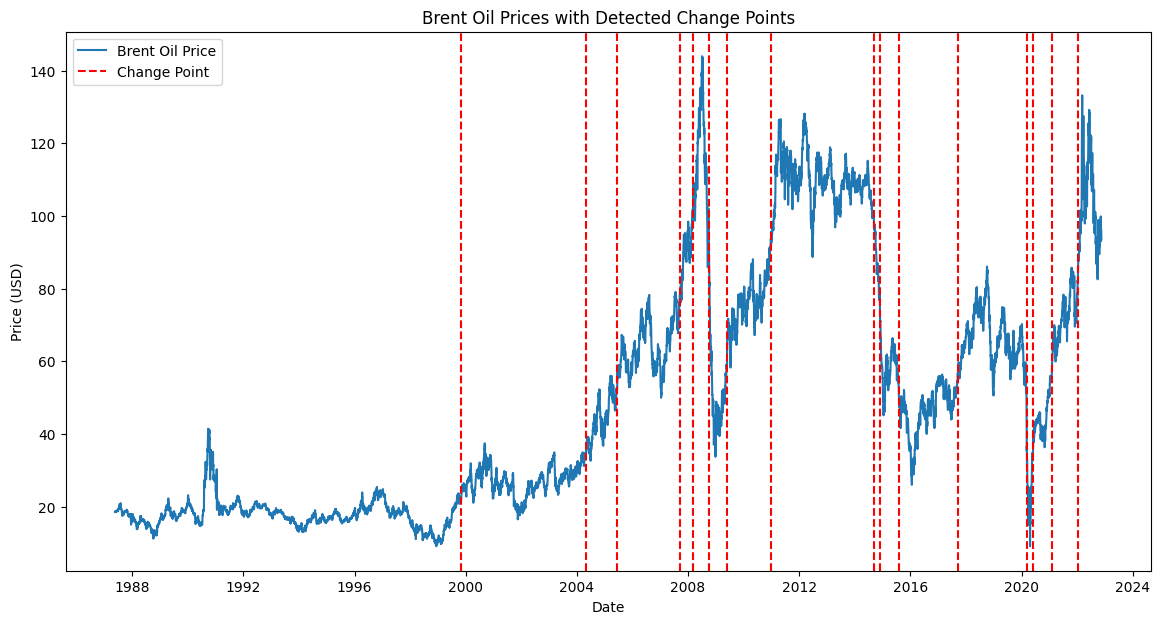

In [12]:
# Detect change points
change_points = detect_change_points(df, penalty=20, model="rbf")

# Plot the change points
plot_change_points(df, change_points)

In [25]:
change_point_dates = df.index[change_points[:-1]].tolist()

In [24]:
change_point_dates

[Timestamp('1999-11-02 00:00:00'),
 Timestamp('2004-05-04 00:00:00'),
 Timestamp('2005-06-16 00:00:00'),
 Timestamp('2007-09-12 00:00:00'),
 Timestamp('2008-03-06 00:00:00'),
 Timestamp('2008-10-08 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2010-12-21 00:00:00'),
 Timestamp('2014-09-08 00:00:00'),
 Timestamp('2014-12-02 00:00:00'),
 Timestamp('2015-08-04 00:00:00'),
 Timestamp('2017-09-19 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2021-02-03 00:00:00'),
 Timestamp('2022-01-14 00:00:00')]

In [28]:
# Create a DataFrame for change points
change_points_df = pd.DataFrame(change_point_dates, columns=['change_point_date'])

# Extract corresponding Brent oil prices at change points
change_points_df['oil_price'] = brent_oil.set_index('Date').loc[change_point_dates].reset_index()['Price']
# Save to CSV
# Add any additional information you want to include
change_points_df['event_description'] = ['Economic demad', 'economic demand','OPEC policy&demand' 'finanicial crisis& confict','demand','economic growth& geopolitics','finanicial crisis','finanicial crisis','increased demand','economy demand','increased supply','massive supply','OPEC policy','COVID-19','Covid-19','economic recovery','Russia-Ukarain war']  # Example descriptions
change_points_df.to_csv('change_points.csv', index=False)

In [ ]:
import pandas as pd
import plotly.express as px

# Read the .csv files
historical_data = pd.read_csv('../Data/BrentOilPrices.csv')
change_points_data = pd.read_csv('change_points.csv')

# Convert 'Date' columns to datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
change_points_data['Date'] = pd.to_datetime(change_points_data['change_point_date'])

# Merge the dataframes on 'Date'
merged_data = pd.merge(historical_data, change_points_data, on='Date', how='left')

# Create line chart for historical oil prices
fig = px.line(merged_data, x='Date', y='Price', title='Historical Oil Prices with Change Points and Major Events')

# Add scatter points for change points
fig.add_scatter(x=merged_data[merged_data['Change_point_date'].notna()]['Date'],
                y=merged_data[merged_data['Change_point_date'].notna()]['oil_price'],
                mode='markers', name='Change Points', marker=dict(color='red', size=10))

# Add text annotations for major events
for index, row in merged_data[merged_data['event_description'].notna()].iterrows():
    fig.add_annotation(x=row['Date'], y=row['Price'], text=row['event_description'], showarrow=True, arrowhead=2)

# Show figure
fig.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20036\4212822000.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



KeyError: 'Change_point_date'

In [ ]:
import pandas as pd
import plotly.express as px

def line_chart_with_annotations(historical_file, change_points_file):
    historical_data = pd.read_csv(historical_file)
    change_points_data = pd.read_csv(change_points_file)

    historical_data['Date'] = pd.to_datetime(historical_data['Date'])
    change_points_data['Date'] = pd.to_datetime(change_points_data['Date'])

    merged_data = pd.merge(historical_data, change_points_data, on='Date', how='left')

    fig = px.line(merged_data, x='Date', y='Price', title='Historical Oil Prices with Change Points and Major Events')
    fig.add_scatter(x=merged_data[merged_data['Change_Point'].notna()]['Date'],
                    y=merged_data[merged_data['Change_Point'].notna()]['Price'],
                    mode='markers', name='Change Points', marker=dict(color='red', size=10))
    for index, row in merged_data[merged_data['Major_Event'].notna()].iterrows():
        fig.add_annotation(x=row['Date'], y=row['Price'], text=row['Major_Event'], showarrow=True, arrowhead=2)

    fig.show()


In [ ]:
import plotly.graph_objects as go

def scatter_plot_with_color_coding(historical_file, change_points_file):
    historical_data = pd.read_csv(historical_file)
    change_points_data = pd.read_csv(change_points_file)

    historical_data['Date'] = pd.to_datetime(historical_data['Date'])
    change_points_data['Date'] = pd.to_datetime(change_points_data['Date'])

    merged_data = pd.merge(historical_data, change_points_data, on='Date', how='left')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=merged_data['Date'], y=merged_data['Price'], mode='lines', name='Oil Prices'))
    fig.add_trace(go.Scatter(x=merged_data[merged_data['Change_Point'].notna()]['Date'],
                             y=merged_data[merged_data['Change_Point'].notna()]['Price'],
                             mode='markers', name='Change Points', marker=dict(color='red', size=10)))
    fig.add_trace(go.Scatter(x=merged_data[merged_data['Major_Event'].notna()]['Date'],
                             y=merged_data[merged_data['Major_Event'].notna()]['Price'],
                             mode='markers', name='Major Events', marker=dict(color='blue', size=10)))

    fig.show()
